# Quadratic Least Square Fitting

## Importing Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable as ptbl

In [29]:
X = np.arange(1,7,1)
y = np.array([2.6,5.4,8.7,12.1,16,20.2])

## Quadratic Least square fitting function

## y = a0 + a1X + a2X^2
 

In [30]:
def QuadraticFitting(x,y):

    x_four_sum = sum(x**4)
    x_three_sum = sum(x**3)
    x_sq_sum = sum(x**2)
    x_sum = sum(x)
    n = len(x)

    y_xsq_sum = sum(y*(x**2))
    yx_sum = sum(x*y)
    y_sum = sum(y)

    A = np.array([
        [n,             x_sum,          x_sq_sum    ],
        [x_sum,         x_sq_sum,       x_three_sum ],
        [x_sq_sum,      x_three_sum,    x_four_sum  ],
        ])
    
    b = np.array([
        [y_sum],
        [yx_sum],
        [y_xsq_sum]
        ])

    print(A,"\n",b)
    invA = np.linalg.inv(A)
    M = np.matmul(invA,b)
    
    return M


## Calling Quadratic least square fitting function on given database

In [31]:
M = QuadraticFitting(X,y)

[[   6   21   91]
 [  21   91  441]
 [  91  441 2275]] 
 [[  65. ]
 [ 289.1]
 [1423.3]]


In [32]:
a2 = M[0][0]
a1 = M[1][0]
a0 = M[2][0]

## Visualizing coefficients and constants

In [33]:
print(f"a0 = {a0}\ta1 = {a1}\ta2 = {a2}")

a0 = 0.16785714285713027	a1 = 2.3450000000000273	a2 = 0.08000000000015461


## Calculating Approximate Values

In [34]:
y_pred = a2*(X**2) + a1*X + a0

## Table of actual values and predicted values

In [35]:
table = ptbl(['X','y','y-predicted'])
for i in range(len(X)):
    table.add_row([X[i],y[i],y_pred[i]])
print(table)

+---+------+--------------------+
| X |  y   |    y-predicted     |
+---+------+--------------------+
| 1 | 2.6  | 2.592857142857312  |
| 2 | 5.4  | 5.177857142857803  |
| 3 | 8.7  | 7.922857142858604  |
| 4 | 12.1 | 10.827857142859713 |
| 5 | 16.0 | 13.892857142861132 |
| 6 | 20.2 | 17.11785714286286  |
+---+------+--------------------+


## Visualizing Best Fit Curve

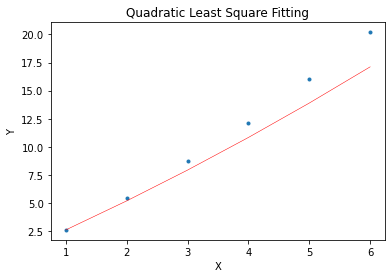

In [36]:
plt.scatter(X,y, marker = '.')
plt.plot(X,y_pred,color = 'red',linewidth = 0.5)
plt.title('Quadratic Least Square Fitting')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Evaluating Error in reconstruction

In [37]:
max_rel_error = max(abs(y-y_pred)/y)
print(max_rel_error)

0.1525813295612445


In [38]:
for i in range(5):
    print(f"y[{i}] = {y[i]}\ty_predict[{i}] = {y_pred[i]}")

y[0] = 2.6	y_predict[0] = 2.592857142857312
y[1] = 5.4	y_predict[1] = 5.177857142857803
y[2] = 8.7	y_predict[2] = 7.922857142858604
y[3] = 12.1	y_predict[3] = 10.827857142859713
y[4] = 16.0	y_predict[4] = 13.892857142861132
